In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastcore.all import *
import time
import re

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url, data={'q': term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')

    urls, data = set(), {'next': 1}

    while len(urls) < max_images and 'next' in data:
        data = urljson(requestUrl, data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)

    return L(urls)[:max_images]


In [ ]:
from fastdownload import download_url
from fastai.vision.all import *


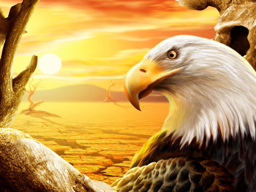

In [ ]:
urls = search_images('eagle photos', max_images = 1)
urls[0]

dest = 'eagle.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

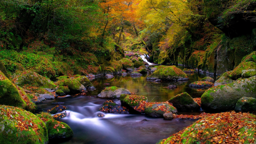

In [ ]:
urls = search_images('forest photos', max_images = 1)
urls[0]

dest = 'forest.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)


In [ ]:
searches = 'forest', 'eagle'
path = Path('eagle_or_not')

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok = True, parents = True)
  download_images(dest, urls = search_images(f'{o} photo'))
  resize_images(path/o, max_size = 400,dest = path/o)

In [ ]:
failed_images = verify_images(get_image_files(path))
failed_images = failed_images.map(Path.unlink)
print(len(failed_images))

print(len(get_image_files(path)))

0
108


In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')],
).dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.854130,1.764942,0.619048,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.686891,0.982098,0.380952,00:15
1,1.461674,0.533029,0.238095,00:15
2,1.158816,0.327436,0.142857,00:15
3,0.889646,0.191775,0.142857,00:15
4,0.725212,0.109139,0.047619,00:15
5,0.603939,0.053468,0.000000,00:15
6,0.516100,0.023856,0.000000,00:15
7,0.451031,0.011420,0.000000,00:15
8,0.397512,0.006863,0.000000,00:15
9,0.356159,0.005035,0.000000,00:15


In [ ]:
is_eagle,_,prob = learn.predict(PILImage.create('eagle.jpg'))
print(f"This is a {is_eagle}.")
print(f"Probability it's a eagle: {prob[0]:.4f}")

This is a eagle.
Probability it's a eagle: 1.0000
